In [2]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
!pip install ydata_profiling
from ydata_profiling import ProfileReport

df = pd.read_csv(r'/content/sample_data/sentimentdataset (Project 1).csv')
ProfileReport(df, title="Sentiment Dataset Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print(df.isnull().sum())

Source     0
ID         0
Message    0
Target     0
dtype: int64


In [4]:
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,Source,ID,Message,Target
0,Yelp,0,Crust is not good.,0
1,Yelp,1,Not tasty and the texture was just nasty.,0
2,Yelp,2,Stopped by during the late May bank holiday of...,1
3,Yelp,3,The selection on the menu was great and so wer...,1
4,Yelp,4,Now I am getting angry and I want my damn pho.,0


In [5]:
print(df.dtypes)

Source     object
ID          int64
Message    object
Target      int64
dtype: object


In [6]:
print("\nDataset summary:")
df.info()


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Source   2745 non-null   object
 1   ID       2745 non-null   int64 
 2   Message  2745 non-null   object
 3   Target   2745 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 85.9+ KB


In [7]:
print("\nNumerical column statistics:")
print(df.describe())


Numerical column statistics:
                ID       Target
count  2745.000000  2745.000000
mean    464.711475     0.504554
std     276.335259     0.500070
min       0.000000     0.000000
25%     228.000000     0.000000
50%     457.000000     1.000000
75%     686.000000     1.000000
max     998.000000     1.000000


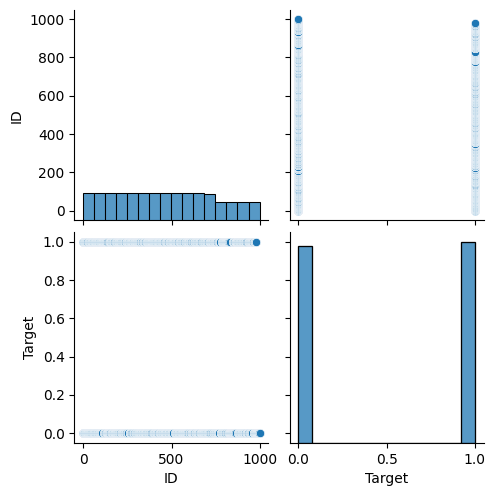

In [8]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

In [9]:
class_distribution = df['Target'].value_counts()
print("\nClass Distribution:\n", class_distribution)


Class Distribution:
 Target
1    1385
0    1360
Name: count, dtype: int64


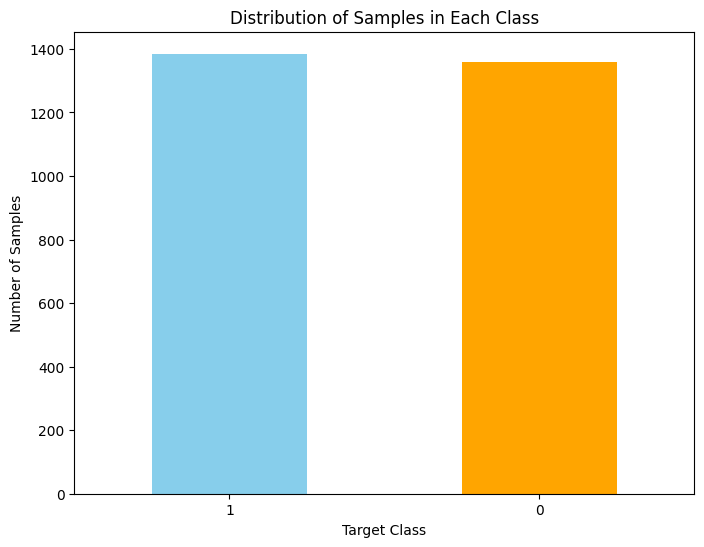

In [10]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Samples in Each Class')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [11]:
columns_to_drop = ['ID', 'Source']
df = df.drop(columns_to_drop, axis=1, errors='ignore')

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

df['Processed_Message'] = df['Message'].apply(preprocess_text)

print("\nDataset after text preprocessing:")
print(df[['Message', 'Processed_Message']])


Dataset after text preprocessing:
                                                Message  \
0                                    Crust is not good.   
1             Not tasty and the texture was just nasty.   
2     Stopped by during the late May bank holiday of...   
3     The selection on the menu was great and so wer...   
4        Now I am getting angry and I want my damn pho.   
...                                                 ...   
2740  The screen does get smudged easily because it ...   
2741  What a piece of junk.. I lose more calls on th...   
2742                       Item Does Not Match Picture.   
2743  The only thing that disappoint me is the infra...   
2744  You can not answer calls with the unit, never ...   

                                      Processed_Message  
0                                          crust good .  
1                                 tasty texture nasty .  
2     stop late bank holiday Rick Steve recommendati...  
3                       

In [12]:
# Method: CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Message'])

print(X)

  (0, 906)	1
  (0, 1620)	1
  (1, 3626)	1
  (1, 3660)	1
  (1, 2423)	1
  (2, 3483)	1
  (2, 2093)	1
  (2, 324)	1
  (2, 1778)	1
  (2, 3054)	1
  (2, 3473)	1
  (2, 2954)	1
  (2, 2194)	1
  (3, 3210)	1
  (3, 2308)	1
  (3, 1648)	1
  (3, 2813)	1
  (4, 1590)	1
  (4, 188)	1
  (4, 4012)	1
  (4, 932)	1
  (4, 2685)	1
  (5, 1786)	1
  (5, 3623)	1
  (5, 1517)	1
  :	:
  (2739, 1461)	1
  (2740, 3745)	1
  (2740, 1179)	1
  (2740, 1353)	1
  (2740, 3179)	1
  (2740, 1167)	1
  (2740, 3361)	1
  (2741, 2700)	1
  (2741, 2185)	1
  (2741, 2030)	1
  (2741, 539)	1
  (2741, 2687)	1
  (2742, 2699)	1
  (2742, 1981)	1
  (2742, 2266)	1
  (2743, 2958)	1
  (2743, 3675)	1
  (2743, 1052)	1
  (2743, 1908)	1
  (2743, 2766)	1
  (2743, 1968)	1
  (2744, 4107)	1
  (2744, 539)	1
  (2744, 3871)	1
  (2744, 199)	1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Target'], test_size=0.2, random_state=42)

print("\nShape of the training set:", X_train.shape)
print("Shape of the testing set:", X_test.shape)
print("Shape of the training labels:", y_train.shape)
print("Shape of the testing labels:", y_test.shape)


Shape of the training set: (2196, 4153)
Shape of the testing set: (549, 4153)
Shape of the training labels: (2196,)
Shape of the testing labels: (549,)


In [14]:
svc = LinearSVC(dual=False,max_iter=7000)
svcGridParameters = {'C': [0.1, 1, 10]}
svcSearch = GridSearchCV(svc, svcGridParameters, cv=5)
svcSearch.fit(X_train, y_train)
best_svc = svcSearch.best_estimator_
y_Predict = best_svc.predict(X_test)
print("SVC Report:")
print(classification_report(y_test, y_Predict))

SVC Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       265
           1       0.86      0.77      0.81       284

    accuracy                           0.82       549
   macro avg       0.82      0.82      0.82       549
weighted avg       0.82      0.82      0.82       549



In [15]:
nn = MLPClassifier()
nnGridParameters = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'batch_size': [32, 64, 128]}
nnSearch = GridSearchCV(nn, nnGridParameters, cv=5)
nnSearch.fit(X_train, y_train)

best_nn = nnSearch.best_estimator_
y_Predict = best_nn.predict(X_test)

print("Artificial Neural Network Report:")
print(classification_report(y_test, y_Predict))

Artificial Neural Network Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       265
           1       0.80      0.75      0.77       284

    accuracy                           0.77       549
   macro avg       0.77      0.77      0.77       549
weighted avg       0.77      0.77      0.77       549



In [16]:
import joblib

# Save the best LinearSVC model to a file
joblib.dump(best_svc, 'best_linear_svc_model.pkl')

['best_linear_svc_model.pkl']

In [17]:
# Reloading the best model
loaded_best_svc = joblib.load('best_linear_svc_model.pkl')

In [18]:
# New unlabeled data (to be predicted)
new_unlabeled_data = [
    "the weather today is absolutely delightful, perfect for a picnic in the park.",
    "The movie I watched last night was incredibly heartwarming, and the acting was superb.",
    "My family and friends always support me no matter what, and I'm grateful for their presence in my life.",
    "The service at the restaurant was appalling; the food took forever, and it was cold when it finally arrived.",
    "I'm feeling utterly disappointed by the lack of effort put into the project by some team members.",
    "The traffic this morning was horrendous; I was late for an important meeting and missed some crucial discussions."

]

# Preprocess the new unlabeled text data (using the same preprocessing function as before)
processed_new_data = [preprocess_text(text) for text in new_unlabeled_data]

# Vectorize the processed new data using the existing vectorizer
X_new = vectorizer.transform(processed_new_data)

# Use the loaded best model for predictions on the new unlabeled data
predictions = loaded_best_svc.predict(X_new)

# Print the predictions
print("Predictions for new unlabeled data:")
for text, prediction in zip(new_unlabeled_data, predictions):
    print(f"Text: '{text}' --> Predicted Label: {prediction}")

Predictions for new unlabeled data:
Text: 'the weather today is absolutely delightful, perfect for a picnic in the park.' --> Predicted Label: 1
Text: 'The movie I watched last night was incredibly heartwarming, and the acting was superb.' --> Predicted Label: 1
Text: 'My family and friends always support me no matter what, and I'm grateful for their presence in my life.' --> Predicted Label: 1
Text: 'The service at the restaurant was appalling; the food took forever, and it was cold when it finally arrived.' --> Predicted Label: 0
Text: 'I'm feeling utterly disappointed by the lack of effort put into the project by some team members.' --> Predicted Label: 0
Text: 'The traffic this morning was horrendous; I was late for an important meeting and missed some crucial discussions.' --> Predicted Label: 0
